<a href="https://colab.research.google.com/github/ivnizhnik/Python_for_Data_Science/blob/main/Analysis_on_Mortgage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df='/content/mortgages.csv'
df=pd.read_csv(df)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
df['Mortgage Name'].value_counts()

30 Year    720
15 Year    360
Name: Mortgage Name, dtype: int64

In [ ]:
df['Interest Rate'].value_counts()

0.05    540
0.03    540
Name: Interest Rate, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
mortgage30y_Filter = df['Mortgage Name'] == '30 Year'
df.loc[mortgage30y_Filter, :]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


In [ ]:
interest3_Filter = df['Interest Rate']==0.03
df.loc[interest3_Filter, :]


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
895,176,13706.74,2762.33,34.26,2728.07,10978.67,15 Year,0.03
896,177,10978.67,2762.33,27.44,2734.89,8243.78,15 Year,0.03
897,178,8243.78,2762.33,20.60,2741.73,5502.05,15 Year,0.03
898,179,5502.05,2762.33,13.75,2748.58,2753.47,15 Year,0.03


In [ ]:
interest5_Filter = df['Interest Rate']==0.05
df.loc[interest5_Filter, :]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
1075,176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
1076,177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
1077,178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05
1078,179,6286.86,3163.17,26.19,3136.98,3149.88,15 Year,0.05


In [ ]:
filter_30y5 = mortgage30y_Filter & interest5_Filter
df.loc[filter_30y5, :]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


In [ ]:
OR 

In [ ]:
filter_30y5 = df.loc[mortgage30y_Filter & interest5_Filter, :]
filter_30y5.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


In [ ]:
filter_30y3 = mortgage30y_Filter & interest3_Filter
df.loc[filter_30y3, :]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


In [ ]:
filter_30y5 = df.loc[mortgage30y_Filter & interest5_Filter, :]
filter_30y5['Interest Paid'].cumsum()

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

In [ ]:
filter_30y3 = df.loc[mortgage30y_Filter & interest3_Filter, :]
filter_30y3['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

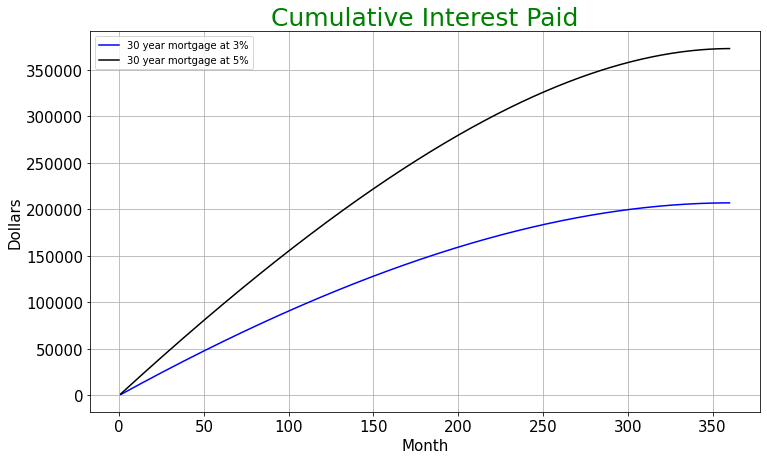

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 7))
axes.plot(filter_30y3['Month'], filter_30y3['Interest Paid'].cumsum(), color = 'blue', label = '30 year mortgage at 3%');
axes.plot(filter_30y5['Month'], filter_30y5['Interest Paid'].cumsum(), color = 'black', label = '30 year mortgage at 5%');
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Dollars', fontsize = 15)
plt.title('Cumulative Interest Paid', fontsize = 25, c='g')
plt.grid()
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15);
plt.legend();